## Introduccion

### Descripcion del proyecto

En este proyecto, analizaremos los datos de los viajes en taxi de Chicago para comprender mejor el mercado y los patrones de viaje.
Pero primero vamos a explorar los datos y responder algunas preguntas sobre los viajes en taxi.

### Objetivos

Vamos a probar la hipotesis de si la duracion promedio de los viajes desde el Loop hasta el Aeropuerto Internacional OHare cambia si llueve los sabados.

## Preparacion de los datos

### Importar librerias necesarias apra el analisis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Leer archivos CSV

In [9]:
df1 = pd.read_csv('datasets/project_sql_result_01.csv')
df2 = pd.read_csv('datasets/project_sql_result_04.csv')
df3 = pd.read_csv('datasets/project_sql_result_07.csv')

## Analisis descriptivo inicial 

#### Verificacion de los tipos de datos

In [10]:
print(df1.head())
print()
print(df2.head())
print()
print(df3.head())   
print()
print(df1.dtypes)
print()
print(df2.dtypes)
print()
print(df3.dtypes)
print()
print(df3['weather_conditions'].value_counts())   


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

company_name    object
trips_amount     int64
dtype: object

dropoff_location_name     object
average_trips  

#### Verificacion de duplicados

In [11]:
duplicados_df1 = df1.duplicated()
print(f"Duplicados encontrados en df1 = {duplicados_df1.sum()}")
duplicados_df2 = df2.duplicated()
print(f"Duplicados encontrados en df2 = {duplicados_df2.sum()}")
duplicados_df3 = df3.duplicated()
print(f"Duplicados encontrados en df3 = {duplicados_df3.sum()}")

Duplicados encontrados en df1 = 0
Duplicados encontrados en df2 = 0
Duplicados encontrados en df3 = 197


#### Verificacion de nulos

In [12]:
print(df1.info())
print()
print(df2.info())
print()
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2  

Realizando un analisis de los resultados que obtuvimo,s podemos darnos cuenta que no existen valores nulos en ninguna de las tres tablas, pero si existen duplicados en la tabla df3 asi que decidimos eliminarlos.

Ademas podemos observar un tipo de dato incorrecto para df3['start_ts] ya que es una fecha y esta como objeto entonces tendremos que modificarlo al tipo indicado.

#### Eliminacion duplicados de la tabla df3

In [13]:
df3 = df3.drop_duplicates()

#### Cambiar el tipo de datos de la columna start_ts a datetime

In [14]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'])

## Analisis de los datos

#### Barrios con mayor numero de viajes

Vamos a realizar un analisis para ver que informacion pueden darnos estos datos, primero empezaremos viendo cuales son los barrios con mayor numero de viajes finalizados en esa ubicacion.

In [15]:
top_neighborhoods = df2.sort_values('average_trips', ascending=False).head(10)
print(top_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


#### Grafico viajes por barrio

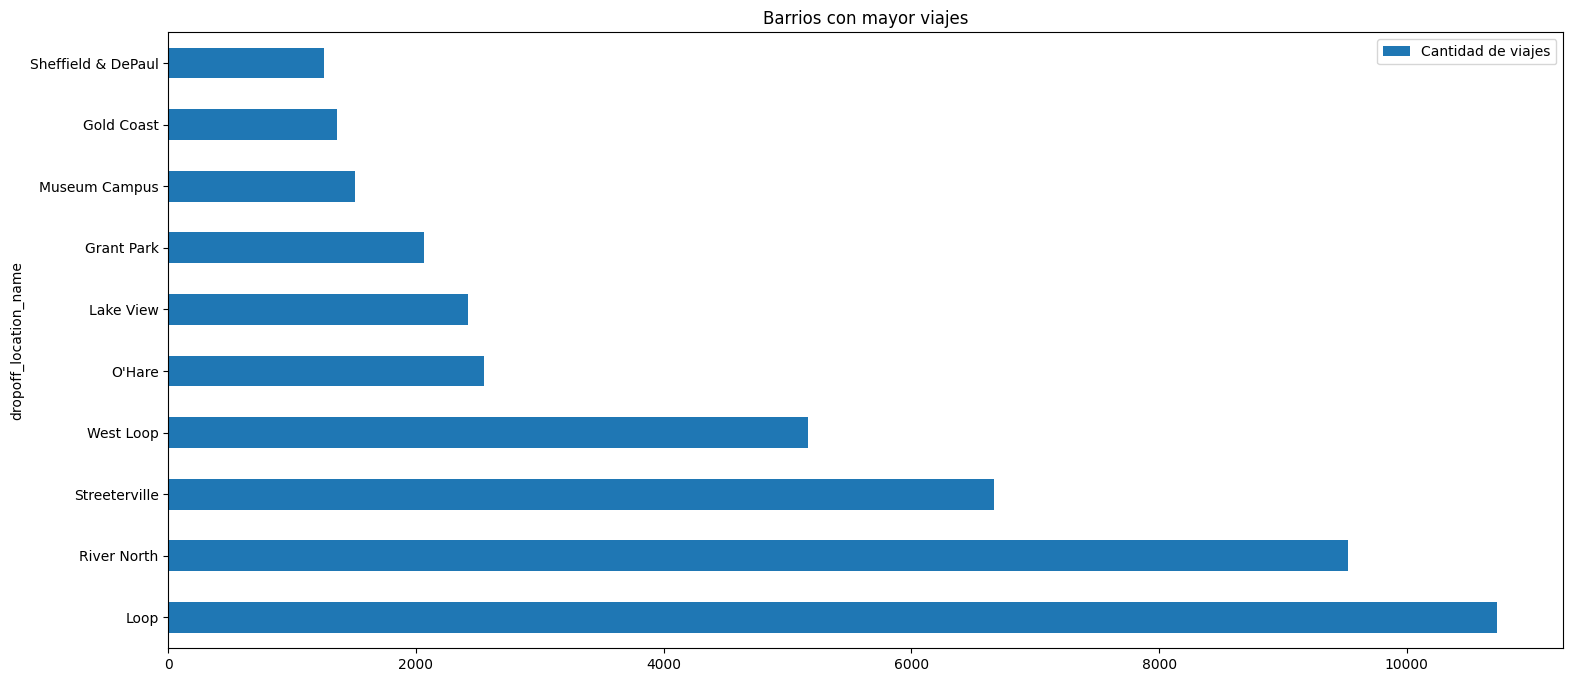

In [16]:
top_neighborhoods.plot(title='Barrios con mayor viajes', 
         label='Cantidad de viajes', 
         kind='barh', 
         x='dropoff_location_name', 
         y='average_trips',
        figsize= (18,8))
plt.show()

Podemos ver que el barrio donde mas viajez se finalizan es en Loop, esto podria indicarnos que es una zona muy turistica o es de las mas pobladas.

#### Compañias con mayor numero de viajes

Creamos un grafico para poder visualizar la informacion sobre el volumen de viajes que maneja cada compañia dentro de estos datos.

In [17]:
top_taxi_companies = df1.sort_values('trips_amount', ascending=False).head(10)
print(top_taxi_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


#### Grafico de viajes por compañia

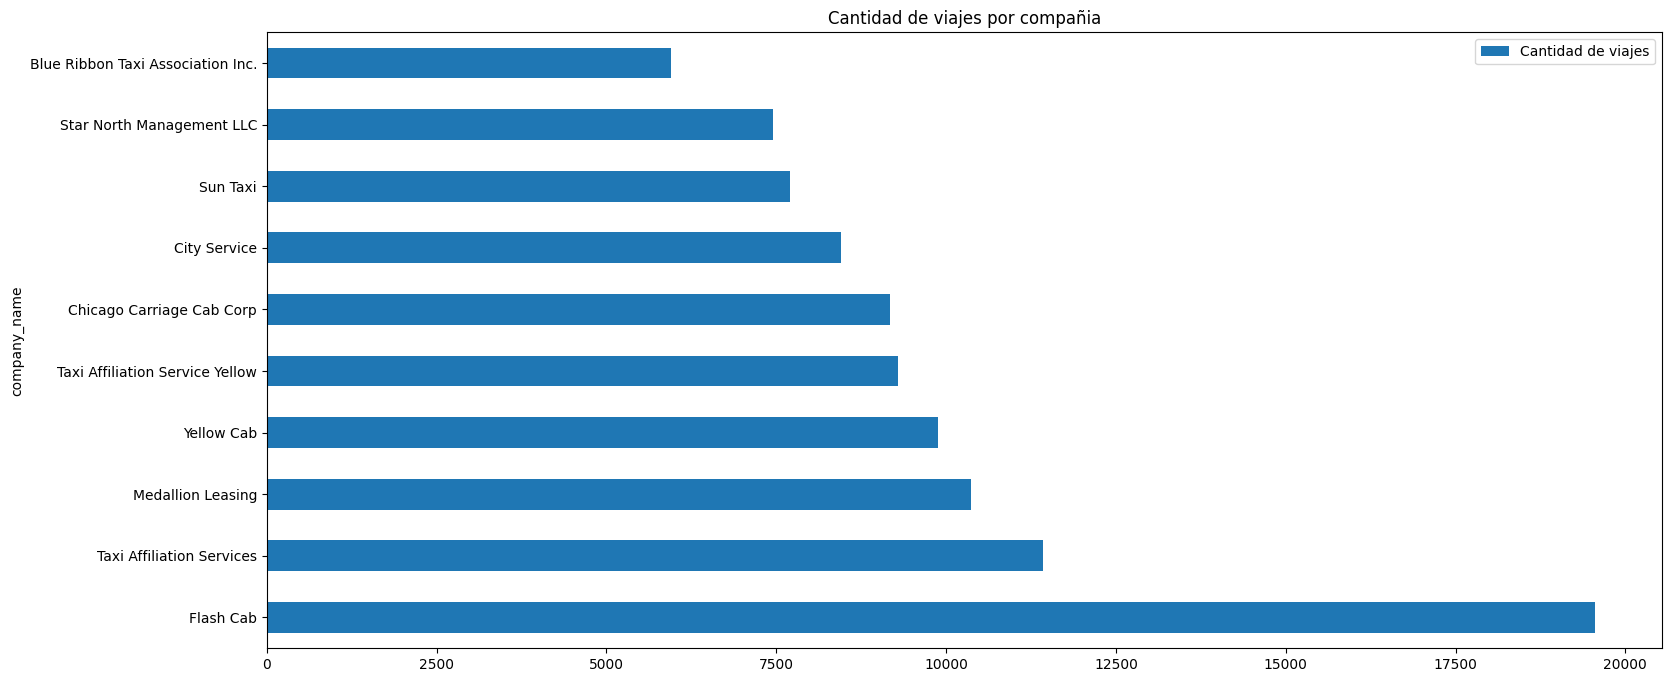

In [18]:
top_taxi_companies.plot(title='Cantidad de viajes por compañia', 
         label='Cantidad de viajes', 
         kind='barh', 
         x='company_name', 
         y='trips_amount',
        figsize= (18,8))
plt.show()

Podemos ver que la compañía Flash Cab es la que más viajes realiza, seguida de Taxi Affiliation Services y Medallion Leasing.<br>
Con estos datos podriamos pensar que la compañía Flash Cab tiene más viajes porque tiene más vehículos.

## Prueba de Hipotesis

### Formulacion de la hipótesis nula y alternativa

Hipotesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

H0: La duración promedio de los viajes es la misma los sábados lluviosos y los demás días (Esto se cumple si alfa es mayor a 0.05)<br>
H1: La duración promedio de los viajes es diferente los sábados lluviosos y los demás días (Esto se cumple si alfa es menor a 0.05)

Alfa: 0.05

Realizar la prueba de hipótesis

In [19]:
rainy_saturdays = df3[(df3['weather_conditions'] == 'Bad') & (df3['start_ts'].dt.dayofweek == 5)]['duration_seconds']
other_days = df3[(df3['weather_conditions'] != 'Bad') | (df3['start_ts'].dt.dayofweek != 5)]['duration_seconds']

### Analisis de varianza para determinar prueba

In [20]:
from scipy.stats import levene

stat, p_value = levene(rainy_saturdays, other_days)
print(f"Resultado de la prueba de Levene: p-valor = {p_value}")

if p_value < 0.05:
    print("Las varianzas son diferentes")
else:
    print("Las varianzas son similares")

Resultado de la prueba de Levene: p-valor = 0.9806770360671218
Las varianzas son similares


Se realizara la prueba t-test ya que sus varianzas son muy parecidas.

### Prueba t-test

In [21]:
results = stats.ttest_ind(rainy_saturdays, other_days)
print(results.pvalue)

7.397770692813657e-08


Explicar los resultados de la prueba de hipótesis

In [22]:
alpha = 0.05
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula


Podemos ver que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos, ya que el p-value es menor a 0.05.<br>
Por lo tanto, rechazamos la hipótesis nula y aceptamos la hipótesis alternativa.<br>
Una suposicion seria que los viajes duran más los sábados lluviosos porque hay más tráfico en las calles.